In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

* Generate data: two concentric rings
* Map data into higher dimensions

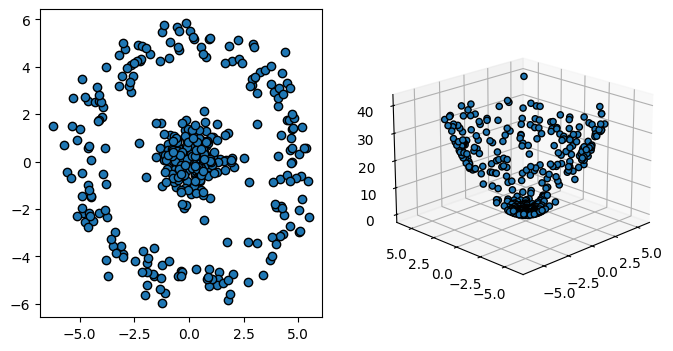

In [2]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 2, 1)
n1 = 200
xy_center = 0.8*np.random.randn(2,n1)

n2 = n1
r2 = 5
angles = 2*np.pi*np.random.rand(n2)
radii = r2 + 0.5*np.random.randn(n2)
xy2 = radii*np.array([np.cos(angles),np.sin(angles)])
xy_all = np.hstack((xy_center,xy2))
ax.scatter(*xy_all, edgecolors='black')

ax = fig.add_subplot(1, 2, 2, projection='3d')
z_all = np.sum((xy_all**2),axis=0)
xyz = np.vstack((xy_all, z_all))
ax.scatter(*xyz, edgecolors='black', alpha = 1)
ax.view_init(20, -135)

* Apply linear SVM algorithm
* retrieve plane parameters
$$a x + b y + c z + d ==0$$
$$z = -\frac{1}{c}(a x + b y + d)$$

In [3]:
lables = np.repeat(np.array([1,-1]),n1)
print(lables.shape)
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(xyz.T, lables)
a,b,c = clf.coef_[0]
d = clf.intercept_[0]
# plane meshgrid
x = np.arange(-6,6,0.1)
X,Y = np.meshgrid(x,x)
Z = -1/c*(a*X + b*Y + d)

(400,)


* split data by a plane (boolean mask by height) 
* plot data and plane
* plot boundary projection

for latter task- intersection of parabolic map and a plane is solved via

$$
\begin{cases}
a x + b y + c z + d = 0 \\
z = x^2 + y^2 
\end{cases}
$$
So $ x, y $ such that
$$a x + b y + c (x^2 + y^2) + d = 0 $$


(3, 400)

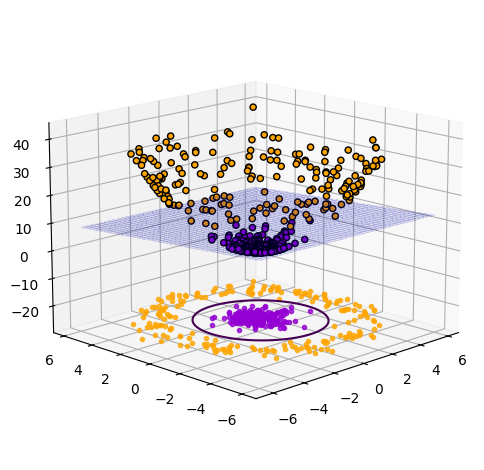

In [4]:
# prepare a height filter. calc plane height for each x,y of data and compare to real Z
Ztest = -1/c*(a*xyz[0] + b*xyz[1] + d)
topMask = xyz[2]> Ztest
# calc projection
ZZ = a*X + b*Y + c*(X*X + Y*Y) + d 

fig, ax = plt.subplots(1,subplot_kw=dict(projection='3d'),tight_layout=True)

ax.scatter(*xyz[:,topMask], edgecolors='black', alpha = 1, c= 'orange')
ax.scatter(*xyz[:,~topMask], edgecolors='black', alpha = 1, c= 'darkviolet')
ax.plot_surface(X, Y, Z,linewidth=0, antialiased=False,alpha=0.1,color='blue')
ax.view_init(15, -135)
ax.plot(*xyz[:,topMask][[0,1]], '.', zdir='z', zs=-25, alpha = 0.8, c = 'orange')
ax.plot(*xyz[:,~topMask][[0,1]], '.', zdir='z', zs=-25, alpha = 0.8, c = 'darkviolet')

ax.contour(X,Y,ZZ, levels=[0], zdir='z', offset=-25, alpha = 1)

xyz.shape